In [1]:
import os

In [3]:
image_path = os.path.join(os.getcwd(), 'images')
if not os.path.exists(image_path):
    !mkdir images

# 1. Importing the libraries


In [4]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

# 2. load the data

In [9]:
#pytorch models takes 224x224 images as input so we resize all the images
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224), #crop the image to 224x224
        transforms.RandomHorizontalFlip(), #flip the image horizontally
        transforms.ToTensor(), #convert the image to a pytorch tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) #normalize the image
    ]),
    'val': transforms.Compose([
        transforms.Resize(256), #resize the image to 256x256
        transforms.CenterCrop(224), #crop the image to 224x224
        transforms.ToTensor(), #convert the image to a pytorch tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) #normalize the image
    ]),
    'test': transforms.Compose([
        transforms.Resize(256), #resize the image to 256x256
        transforms.CenterCrop(224),  #crop the image to 224x224
        transforms.ToTensor(), #convert the image to a pytorch tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) #normalize the image
    ]),
}


In [21]:
images_datasets = {x: datasets.ImageFolder(os.path.join('images', x), data_transforms[x]) for x in ['train', 'val', 'test']} #load the images
dataloaders = {x: torch.utils.data.DataLoader(images_datasets[x], batch_size=8, shuffle=True, num_workers=8) for x in ['train', 'val', 'test']} #create a dataloader for each dataset
data_sizes = {x: len(images_datasets[x]) for x in ['train', 'val', 'test']} #get the size of each dataset

In [22]:
for x in ['train', 'val', 'test']:
    print('Loaded {} images under {}'.format(data_sizes[x], x))

Loaded 18400 images under train
Loaded 2800 images under val
Loaded 2800 images under test


In [23]:
class_names = images_datasets['train'].classes #get the class names
print("Class names: {}".format(class_names))

Class names: ['AMD', 'CNV', 'CSR', 'DME', 'DR', 'DRUSEN', 'MH', 'NORMAL']


In [30]:
#check if cuda is available
if torch.cuda.is_available():
    use_gpu = True
else:
    use_gpu = False
print("Use GPU: {}".format(use_gpu))

Use GPU: False


In [31]:
torch.zeros(1).cuda()

RuntimeError: No CUDA GPUs are available

In [ ]:
#if cuda is anaivable uncomment the following line
#!python -m pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


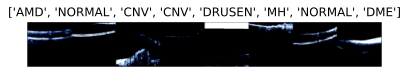

In [28]:
%config InlineBackend.figure_format = 'svg'
inputs , classes = next(iter(dataloaders['train'])) #get a batch of training data
out = torchvision.utils.make_grid(inputs) #make a grid from batch
out = out.numpy().transpose(1,2,0) #convert the tensor to an image
plt.axis('off') #turn off the axis
plt.imshow(out) #show the image
title = [class_names[x] for x in classes] #get the class name for each image
plt.title(title) #show the title
plt.show() #show the plot